# Try-this exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

from sherpa.astro.optical import EmissionGaussian, EmissionLorentz
from sherpa.models.basic import Polynom1D
from sherpa.stats import Chi2
from sherpa.optmethods import LevMar
from sherpa.fit import Fit
from sherpa.data import Data1D

### Problem 1

Find attached to the Canvas page find a text file called "test_spectrum.dat".  This file has three columns: wavelength, flux density, and error in the flux density.  It is a synthetic spectrum representing an emission line on a background that can be expressed as a line.  

Using Sherpa, fit a model consisting of an emission line and a linear background.  For this part of the problem, use a Gaussian profile for the emission line.  The linear background can be modeled using the first two components of `Polynom1D` used above.  

The gaussian profile is described [here](https://sherpa.readthedocs.io/en/latest/model_classes/api/sherpa.astro.optical.EmissionGaussian.html), and is loaded via:

     from sherpa.astro.optical import EmissionGaussian
     gau_1=EmissionGaussian('gau_1')
     
Moreover, a model consisting of two functions that are added together is defined by:
     
     model=poly+gau_1
     
Note:
- The position of the emission line (i.e., gau_1.pos) is frozen by default, so you'll have to thaw it using `gau_1.pos.frozen=False`.
- The "skew" parameter is not used; leave it frozen at the default value.

Once you have the spectrum fit, do the following.
  1. Fit the spectrum and examine the $\chi^2$ of your model fit.  Does the model provide a good fit to the data according to $\chi^2$?  Discuss.
  2. Make a plot of the data overplotted with the model.  Are there any regions of the spectrum that are not adequately fit?  Discuss.
  3. Also useful is the "O-C" plot, in which you plot the difference between the model and the data, i.e., `plt.plot(d.x,d.y-model(d.x))`.  In the O-C plot, the region of the spectrum that are not fit well will be easily recognized.
  

### Answer:

I fit the spectrum as described and got the reduced $\chi^2 = 2.34$. It's hard to know if this is a good fit with just this statistic value... but it seems relatively close to, or at least not wildly far from 1. There seems to be a lot of noise in the "continuum" part, so of course it isn't a very great fit according to $\chi^2$.

I've plotted the data and the model as well as their residual below. We can see that the part that is not adequately fit is the emission itself. Perhaps then a different model could be used (which I assume is the basis of the next two problems).

Method                = levmar
Statistic             = chi2
Initial fit statistic = 16252.3
Final fit statistic   = 926.841 at function evaluation 75
Data points           = 401
Degrees of freedom    = 396
Probability [Q-value] = 1.49644e-44
Reduced statistic     = 2.34051
Change in statistic   = 15325.5
   emissiongaussian.fwhm   1025.5       +/- 15.0431     
   emissiongaussian.pos   6000.04      +/- 0.131218    
   emissiongaussian.flux   152.664      +/- 2.05339     
   polynom1d.c0   9.91304      +/- 0.579488    
   polynom1d.c1   -0.000806821 +/- 9.65215e-05 


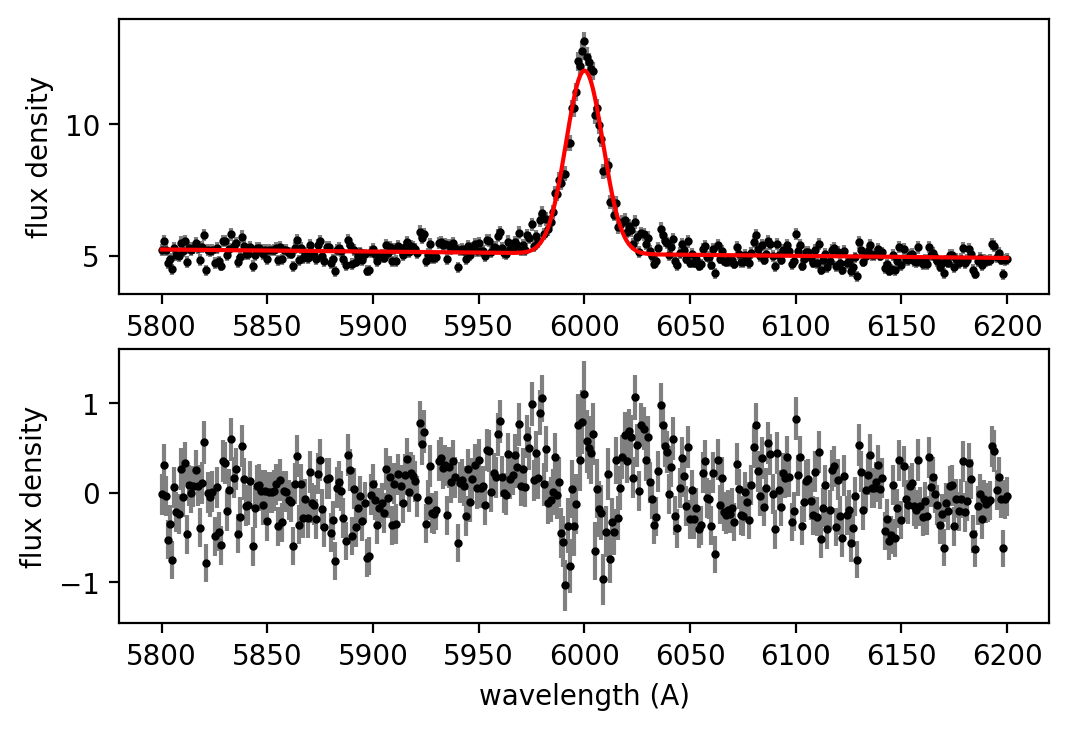

In [2]:
data = np.loadtxt('test_spectrum.dat')
line_wave = data[[np.argmax(data[:, 1])], 0]
init_noise_level = data[:, 1].min()

data = Data1D('test_spec', data[:, 0], data[:, 1], data[:, 2])

# initialize model
gauss = EmissionGaussian()
gauss.pos.frozen = False
gauss.pos = line_wave
gauss.fwhm = gauss.fwhm.default_val

linear = Polynom1D()
linear.c0.frozen = False
linear.c1.frozen = False
linear.c0 = init_noise_level
linear.c1 = linear.c1.default_val

model1 = gauss + linear

# fit model
stat1 = Chi2()
opt1 = LevMar()

gfit = Fit(data, model1, stat=stat1, method=opt1)
out1 = gfit.fit()
print(out1.format())

model_y = model1(data.x)

fig, ax = plt.subplots(2, 1, dpi=200)

ax[0].plot(data.x, data.y, 'o', c='k', ms=2)
ax[0].errorbar(data.x, data.y, data.staterror, fmt='none', c='grey', zorder=-1)
ax[0].plot(data.x, model_y, '-', c='r')

ax[1].plot(data.x, data.y - model_y, 'o', c='k', ms=2)
ax[1].errorbar(data.x, data.y - model_y, data.staterror, fmt='none', c='grey', zorder=-1)

ax[0].set_ylabel('flux density')
ax[1].set_xlabel('wavelength (A)')
ax[1].set_ylabel('flux density')

plt.show()

### Problem 2

Add a second Gaussian line to your model above and fit, and do the following:

   1. Evaluate the improvement in the $\chi^2$ between this model and the model in Problem 1 using the F statistic.  Is the improvement significant?  Discuss.
   2. Make a plot of the data overplotted with this model.  Does it look like it provides a better fit?
   

### Answer:

First I must say that there was some problem with fitting this model. When fitting the data and optimizing parameters, it appears that due to randomized initial conditions I get drastically different fits between runs. I ultimately decided on the model parameters that produced the smallest $\chi^2$ after a few trial runs (because the others were terribly high). I even hard-coded those same parameters into the initial conditions and I still could not consistently reproduce the result. Perhaps additional care could have been taken, but I do not know a lot about Sherpa and so I decided to just go with the model with the least $\chi^2$.

The plots for this new model are shown below. For this fit and comparing with the first model, we see the $\chi^2$ improved such that the F statistic here is 1.26 with a p-value of about 0.01. We see that for this number of degrees of freedom this is indeed a significant improvement in the model. Visually, the residual plot makes it appear that the model fits the emission much better as well; the residuals look pretty much like pure noise, other than possible small bumps at 5925 and 6100 angstroms.

Method                = levmar
Statistic             = chi2
Initial fit statistic = 7502.89
Final fit statistic   = 732.482 at function evaluation 178
Data points           = 401
Degrees of freedom    = 393
Probability [Q-value] = 8.49354e-23
Reduced statistic     = 1.86382
Change in statistic   = 6770.41
   gauss1.fwhm    743.239      +/- 0           
   gauss1.pos     6000.15      +/- 0.151201    
   gauss1.flux    96.044       +/- 2.25261     
   gauss2.fwhm    2314.11      +/- 0           
   gauss2.pos     5999.33      +/- 0.796844    
   gauss2.flux    79.909       +/- 3.56079     
   polynom1d.c0   9.76797      +/- 0.582316    
   polynom1d.c1   -0.000791515 +/- 9.69905e-05 
F stat: 1.255756275360084 with p-value 0.0119936136132619


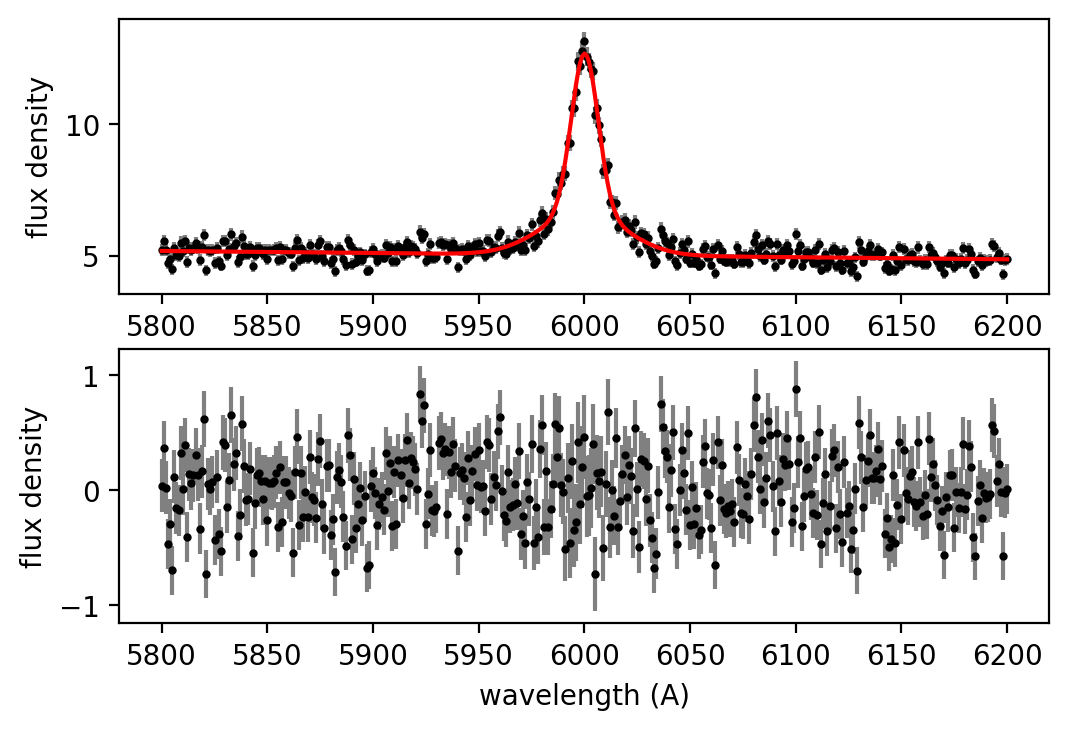

In [10]:
# create model
gauss1 = EmissionGaussian('gauss1')
gauss1.pos.frozen = False
gauss1.pos = line_wave
gauss1.fwhm = gauss1.fwhm.default_val

gauss2 = EmissionGaussian('gauss2')
gauss2.pos.frozen = False
gauss2.pos = line_wave
gauss2.fwhm = gauss2.fwhm.default_val

model2 = gauss1 + gauss2 + linear

# fit model
stat2 = Chi2()
opt2 = LevMar()

gfit = Fit(data, model2, stat=stat2, method=opt2)
out2 = gfit.fit()
print(out2.format())

F = (out1.statval / out1.dof) / (out2.statval / out2.dof)
fdist = ss.f(out1.dof, out2.dof)
pF = 1 - fdist.cdf(F)
print(f'F stat: {F} with p-value {pF}')

model_y = model2(data.x)

fig, ax = plt.subplots(2, 1, dpi=200)

ax[0].plot(data.x, data.y, 'o', c='k', ms=2)
ax[0].errorbar(data.x, data.y, data.staterror, fmt='none', c='grey', zorder=-1)
ax[0].plot(data.x, model_y, '-', c='r')

ax[1].plot(data.x, data.y - model_y, 'o', c='k', ms=2)
ax[1].errorbar(data.x, data.y - model_y, data.staterror, fmt='none', c='grey', zorder=-1)

ax[0].set_ylabel('flux density')
ax[1].set_xlabel('wavelength (A)')
ax[1].set_ylabel('flux density')

plt.show()

### Problem 3

Instead of a Gaussian line, try a Lorentzian profile.  That model is described [here](https://sherpa.readthedocs.io/en/latest/model_classes/api/sherpa.astro.optical.EmissionLorentz.html).

Note:
- The position of the emission line is again frozen by default, so you'll have to thaw it .
- The "kurt" parameter is not used; leave it frozen at the default value.

Next:

   1. Fit the spectrum with the model consisting of the linear model plus the Lorentzian emission line.  Make a plot of the data overplotted by the model. 
   2. Compare the results with the results of Problem 2.  How do the $\chi^2$ compare?  Evaluate using the F statistic.

### Answer:

I have fit the data with the new model as described, and the results are plotted below. The new $\chi^2$ for this model is abour 1.83, which is lower than the previous two models, however compared to the second one, not by much. I calculated the F statistics comparing against both the first and second models. Against the first model, the F statistic was again about 1.28 with p-value 0.007. This is again a significant improvement in the fit for the emission line. Against the second model, the F statistic was only about 1.02 with a p-value of 0.42. This is not a significant improvement in the model as is set by a significance level of $\alpha = 0.05$.

We can therefore conclude that the single Gaussian model is not a great fit for the data, at least compared to the alternatives, being a double Gaussian profile (which has some discrepancy during the parameter optimization process) and a single Lorentzian profile, which we have shown are effectively equally viable in terms of significance.

Method                = levmar
Statistic             = chi2
Initial fit statistic = 8145.85
Final fit statistic   = 723.376 at function evaluation 79
Data points           = 401
Degrees of freedom    = 396
Probability [Q-value] = 1.78231e-21
Reduced statistic     = 1.82671
Change in statistic   = 7422.48
   emissionlorentz.fwhm   796.268      +/- 0           
   emissionlorentz.pos   6000.09      +/- 0.123751    
   emissionlorentz.flux   202.822      +/- 2.42745     
   polynom1d.c0   9.75274      +/- 0.579612    
   polynom1d.c1   -0.000797978 +/- 9.65437e-05 
against model 1 - F stat: 1.2812711700525854 with p-value 0.0069196946655762925
against model 2 - F stat: 1.0203183493430563 with p-value 0.42083424950276305


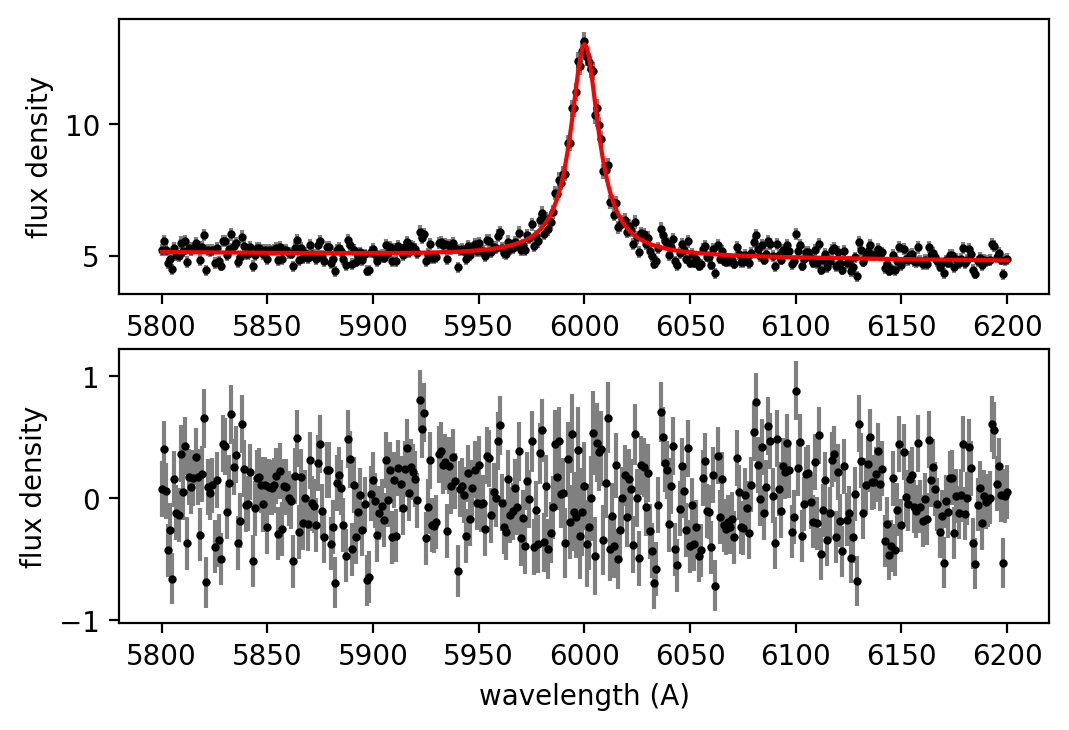

In [11]:
# create model
lorentz = EmissionLorentz()
lorentz.pos.frozen = False
lorentz.pos = line_wave
lorentz.fwhm = gauss1.fwhm.default_val

model3 = lorentz + linear

# fit model
stat3 = Chi2()
opt3 = LevMar()

gfit = Fit(data, model3, stat=stat3, method=opt3)
out3 = gfit.fit()
print(out3.format())

F = (out1.statval / out1.dof) / (out3.statval / out3.dof)
fdist = ss.f(out1.dof, out3.dof)
pF = 1 - fdist.cdf(F)
print(f'against model 1 - F stat: {F} with p-value {pF}')

F = (out2.statval / out2.dof) / (out3.statval / out3.dof)
fdist = ss.f(out2.dof, out3.dof)
pF = 1 - fdist.cdf(F)
print(f'against model 2 - F stat: {F} with p-value {pF}')

model_y = model3(data.x)

fig, ax = plt.subplots(2, 1, dpi=200)

ax[0].plot(data.x, data.y, 'o', c='k', ms=2)
ax[0].errorbar(data.x, data.y, data.staterror, fmt='none', c='grey', zorder=-1)
ax[0].plot(data.x, model_y, '-', c='r')

ax[1].plot(data.x, data.y - model_y, 'o', c='k', ms=2)
ax[1].errorbar(data.x, data.y - model_y, data.staterror, fmt='none', c='grey', zorder=-1)

ax[0].set_ylabel('flux density')
ax[1].set_xlabel('wavelength (A)')
ax[1].set_ylabel('flux density')

plt.show()